In [2]:
import pylatexenc.latex2text as Latex
from pathlib import Path
latex = Latex.LatexNodes2Text()
from analysis import plot_setup, plot_format, get_cmap #, fetch
from utils import mkdir
import wandb

In [3]:
api = wandb.Api()
run = api.run("xmax1/hwat/h7omx9lp")

In [5]:
c = run.config
h = run.history()
s = run.summary
ignore = ['Dense_', 'rng_']
for i,(k,v) in enumerate(s.items()):
    print(f'{latex.latex_to_text(k)} {v:.5f} ')

_timestamp 1669753992.74699 
tr/params/Dense_1-kernel-grad 0.70537 
tr/params/Dense_3-kernel-grad 0.53089 
tr/params/Dense_6-kernel-grad 1.56264 
tr/step 1000.00000 


[None, None, None, None, None]

In [ ]:
import panel as pn
pn.extension()
pn.extension('vega', 'katex')

def display_marquee(text):
    display(pn.panel('<marquee>{text}</marquee>'.format(text=text)))

display_marquee('This Panel was displayed from within a function')

pane.app('localhost:8888')

In [ ]:
git add docs/*
git commit
git push


In [1]:
fetch(
    server_dir  = '/home/energy/amawi/projects/nn_ansatz/src/experiments/PRX_Responses/runs', 
    # avoid       = ['walkers', 'events', 'models'],
    match = ['res_cusp', 'exp_stats_'],
    target_dir  = r'.\PRX_responses\runs',
    # pull = False,
    print_paths=True,
)


labels = {
    'x': 'x', 
    'y': 'y'
}

plots = [
    PlotObj(x='r', y='y', labels=labels),
    PlotObj(x=np.array(1)),
]

pairs = {
    'x': 'math'
}

xticklabel_pairs = {
    'tanh': r'$\tanh$',
}

root = Path('where is the data')
plot_dir = join_and_mkdir(root, 'results/plots')
plot_name = r'af_comparison.png'

figshape, figsize = (1, 1), (6, 5)
fig, axs = plot_setup(usetex=True, figshape=figshape, figsize=figsize)
if isinstance(axs, np.ndarray): axs = iter(axs.flatten())

colors = get_cmap('plasma')

### DATA EXTRACTION ###
data = []
for path in root.iterdir():
    if path.is_file() and ('res' in path.name):
        d = load_pk(path)
        d = {pairs[k]:d[k] for k in pairs}
        data.append(d)

# pandas
data = pd.DataFrame.from_dict(data)
data = data.groupby(by=pairs['bf_af'])

# groups
j = 1
for i, (name, grp) in enumerate(data, 1):
    if name in xticklabel_pairs.keys():
        x = i
        y = grp['$E$'].mean()
        yerr = grp['$E$'].std()
        line = ax.errorbar(
            [j], 
            [y], 
            yerr=[yerr],
            capsize=5,
            marker='x'          
        )
        j += 1

plot_format(
    ax,
    xlabel=r'$\sigma(\cdot)$',
    ylabel=pairs['e_mean_i50000'],
    xlim=(0, 6),
    xticks=np.arange(1, len(xticklabel_pairs)+1),
    xticklabels=[v for v in xticklabel_pairs.values()],
    aspect=0.75,
)

ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 3), useMathText=True, useOffset=False)
ax.tick_params(
        axis='both', 
        which='minor',
        bottom=False,
    )

plt.title('Activation function comparison', fontsize=12, pad=5)
fig.tight_layout()

plt.savefig(
    join_and_mkdir(plot_dir, plot_name), 
    dpi = parg.dpi, 
    pad_inches = parg.pad_inches, 
    bbox_inches = parg.bbox_inches
)

plt.show()

NameError: name 'plot_setup' is not defined

15


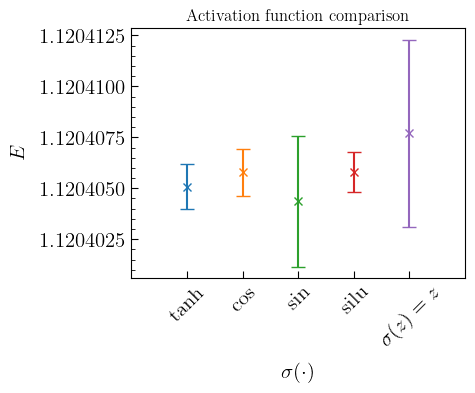

In [20]:
root = Path('./PRX_responses/af/results')
plot_dir = root / 'results/plots'
plot_name = r'af_comparison.png'

pairs = {
    'e_mean_i50000': r'$E$',
    'density_parameter': r'$r_s$',
    'seed': 'seed',
    'bf_af': r'$\sigma(\cdot)$'
}

xticklabel_pairs = {
    'tanh': r'$\tanh$',
    'cos': r'$\cos$', 
    'sin': r'$\sin$', 
    'silu': r'$\mathrm{silu}$', 
    'no_af': r'$\sigma(z) = z$'
}

data = []

for path in root.iterdir():
    if path.is_file():
        d = load_pk(path)
        if 'e_mean_i50000' in d.keys() and not 'e_mean_i100000' in d.keys():

            # print(d.keys())
            d = {pairs[k]:d[k] for k in pairs}
            data.append(d)

print(len(data))

data = pd.DataFrame.from_dict(data)

data = data.groupby(by=pairs['bf_af'])

fig, ax = plot_setup(usetex=True, figshape=(1, 1), figsize=(6, 5))
# axs = iter(axs.flatten())
parg = PlotArgs()

j = 1
for i, (name, grp) in enumerate(data, 1):
    if name in xticklabel_pairs.keys():
        x = i
        y = grp['$E$'].mean()
        yerr = grp['$E$'].std()
        line = ax.errorbar(
            [j], 
            [y], 
            yerr=[yerr],
            capsize=5,
            marker='x'          
        )
        j += 1

plot_format(
    ax,
    xlabel=r'$\sigma(\cdot)$',
    ylabel=pairs['e_mean_i50000'],
    xlim=(0, 6),
    xticks=np.arange(1, len(xticklabel_pairs)+1),
    xticklabels=[v for v in xticklabel_pairs.values()],
    aspect=0.75,
)

ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 3), useMathText=True, useOffset=False)
ax.tick_params(
        axis='both', 
        which='minor',
        bottom=False,
    )

plt.title('Activation function comparison', fontsize=12, pad=5)
fig.tight_layout()

plt.savefig(
    plot_dir / plot_name), 
    dpi = parg.dpi, 
    pad_inches = parg.pad_inches, 
    bbox_inches = parg.bbox_inches
)

plt.show()

In [ ]:
# https://docs.wandb.ai/guides/track/public-api-guide#public-api-examples

# import wandb
# # %env WANDB_SILENT=True # before login 
# wandb.login()
# %wandb f'xmax1/hwat/zdu9sp6h' # -h 2048
# wandb.init()
# wandb.run